# Exploratory Data Analysis for the Regression Problem

This notebook aims to perform the exploratory data analysis regarding the regression of RLU problem.

In [1]:
# imports
import os
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings (to keep notebook clean)
warnings.filterwarnings('ignore')

# definition of constants
DATASOURCE = '../../data/2_processed/'
DATANAME = 'rlu_data.csv'
DATASINK = '../../data/3_model_data/'

In [2]:
# load data
data = pd.read_csv(os.path.join(DATASOURCE, DATANAME))
data.head()

,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,tag6,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,rlu
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


## Feature Distribution Analysis

In this step, a distribution analysis is performed, to check if the distributions are symmetric and if there are zero-low variance columns.

In [3]:
# extract only the features
data_x = data.drop(['rlu'], axis=1)
data.head()

,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,tag6,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,rlu
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


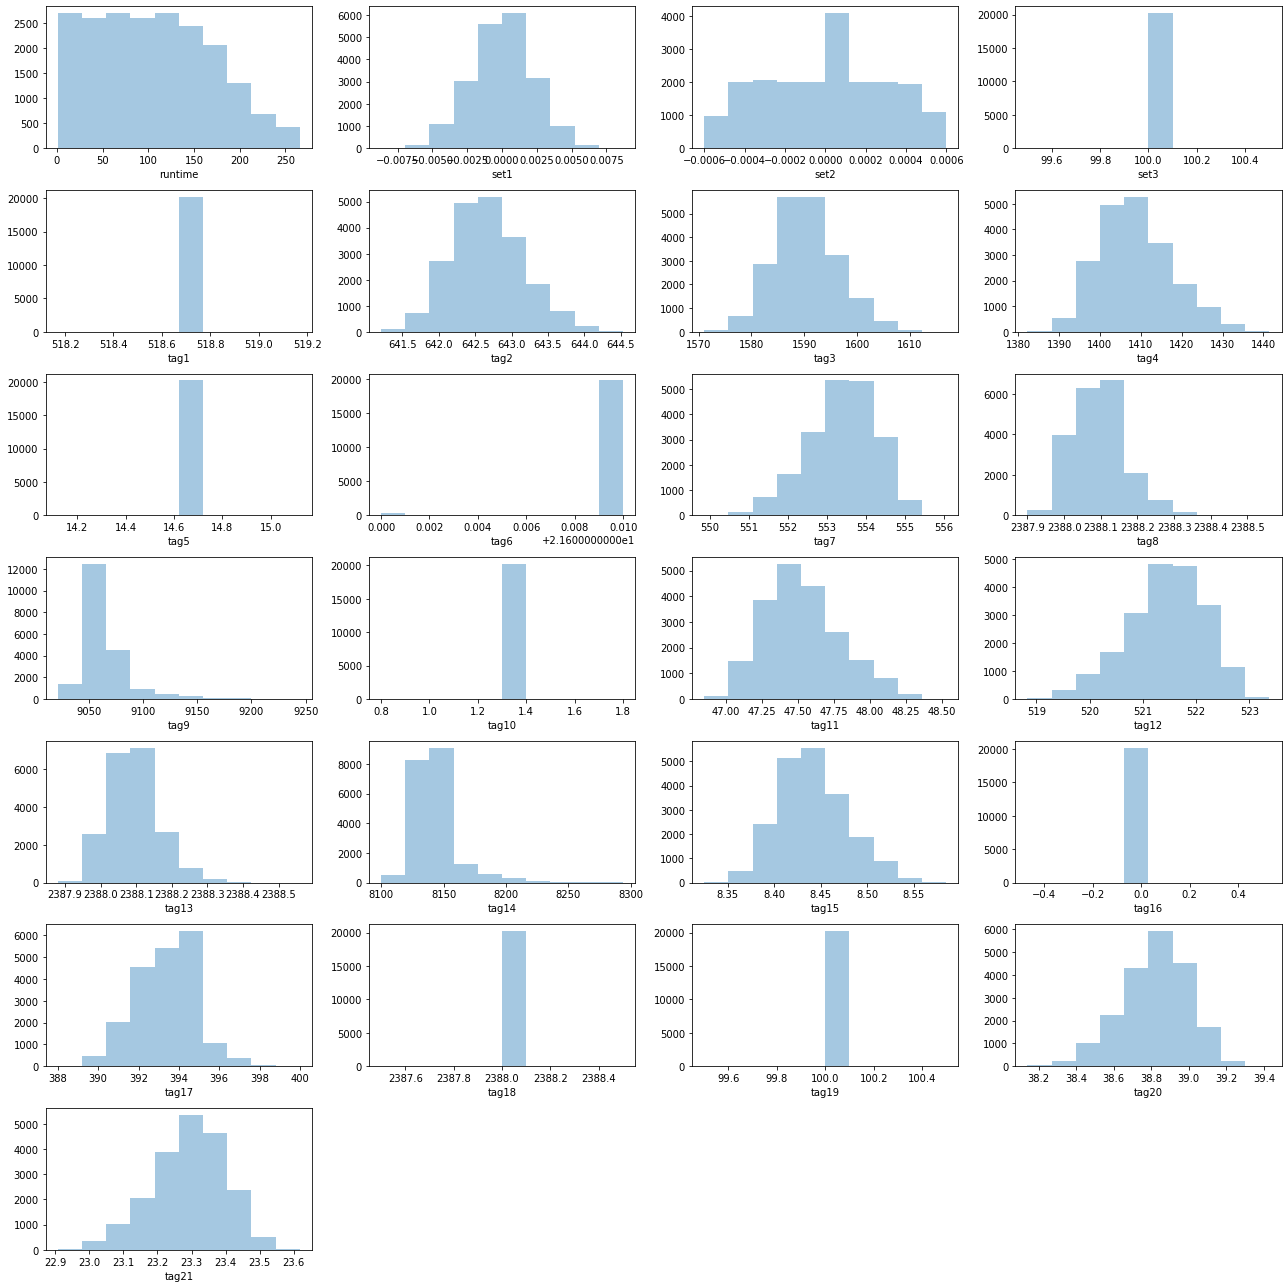

In [4]:
# make the histograms
fig = plt.figure(figsize=(18,18))

for i in range(1, 26):

    ax = fig.add_subplot(7, 4, i)
    ax.hist(data_x.iloc[:,i-1], alpha=0.4)
    ax.set_xlabel(data_x.columns[i-1])

plt.tight_layout()
plt.show()

It's interesting to observe that the majority of sensors measurements present almost symmetric and normal distributions. However there are some columns that present zero or a very low variance. These are: `set3`, `tag1`, `tag5`, `tag6`, `tag10`, `tag16`, `tag18` and `tag19`.

Since columns with zero or very low variance do not contribute with a lot of information about the target, the aforementioned columns will be removed from the original dataset. 

In cases where the number of columns is very high, then a variance threshold could be implemented, such as the `VarianceThreshold` class for `scikit-learn` module. In this case, there are few features, and thus, they could be analysed one by one.

In [5]:
# drop zero or very low variance
data.drop(['set3', 'tag1', 'tag5', 'tag6', 'tag10', 'tag16', 'tag18', 'tag19'], axis=1, inplace=True)
data.head()

,runtime,set1,set2,tag2,tag3,tag4,tag7,tag8,tag9,tag11,tag12,tag13,tag14,tag15,tag17,tag20,tag21,rlu
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


## Duplicated Rows and Columns

One of the most common issues of data quality is the data duplication. This problem affect significantly the quality of the models, since they introduce bias into the data, leading to innacurate conclusions. Column duplication introduce feature importante overestimation, since the information is redundant and then the model can see this information as 'very important'.

On the other hand, row duplicate tend to underestimate the feature importante, since duplicated values reduces the feature variance and thus, can affect the correlations that truly exist in the data.

In [6]:
# checking for row duplication
data_x.duplicated().sum()

0

There are no duplicated rows. No action is required here.

In [7]:
# check for duplicated columns

# list the paired combinations of columns
comb = list(itertools.combinations(data.columns, 2))

# iterate through all the combinations to compare the pairs
dup_cols = []
for col1, col2 in comb:
    if ((col1 not in dup_cols) and (col2 not in dup_cols)):
        if data[col1].equals(data[col2]):
            dup_cols.append(col1)

# check how many cols are duplicated
print(len(dup_cols))

0


There are no duplicated columns. No action is required here.

## Checking for Outliers

It is important to check if there extreme values in the dataset. Extreme values can degrade model's predictive performance, since they tend to penalize too much the loss functions.

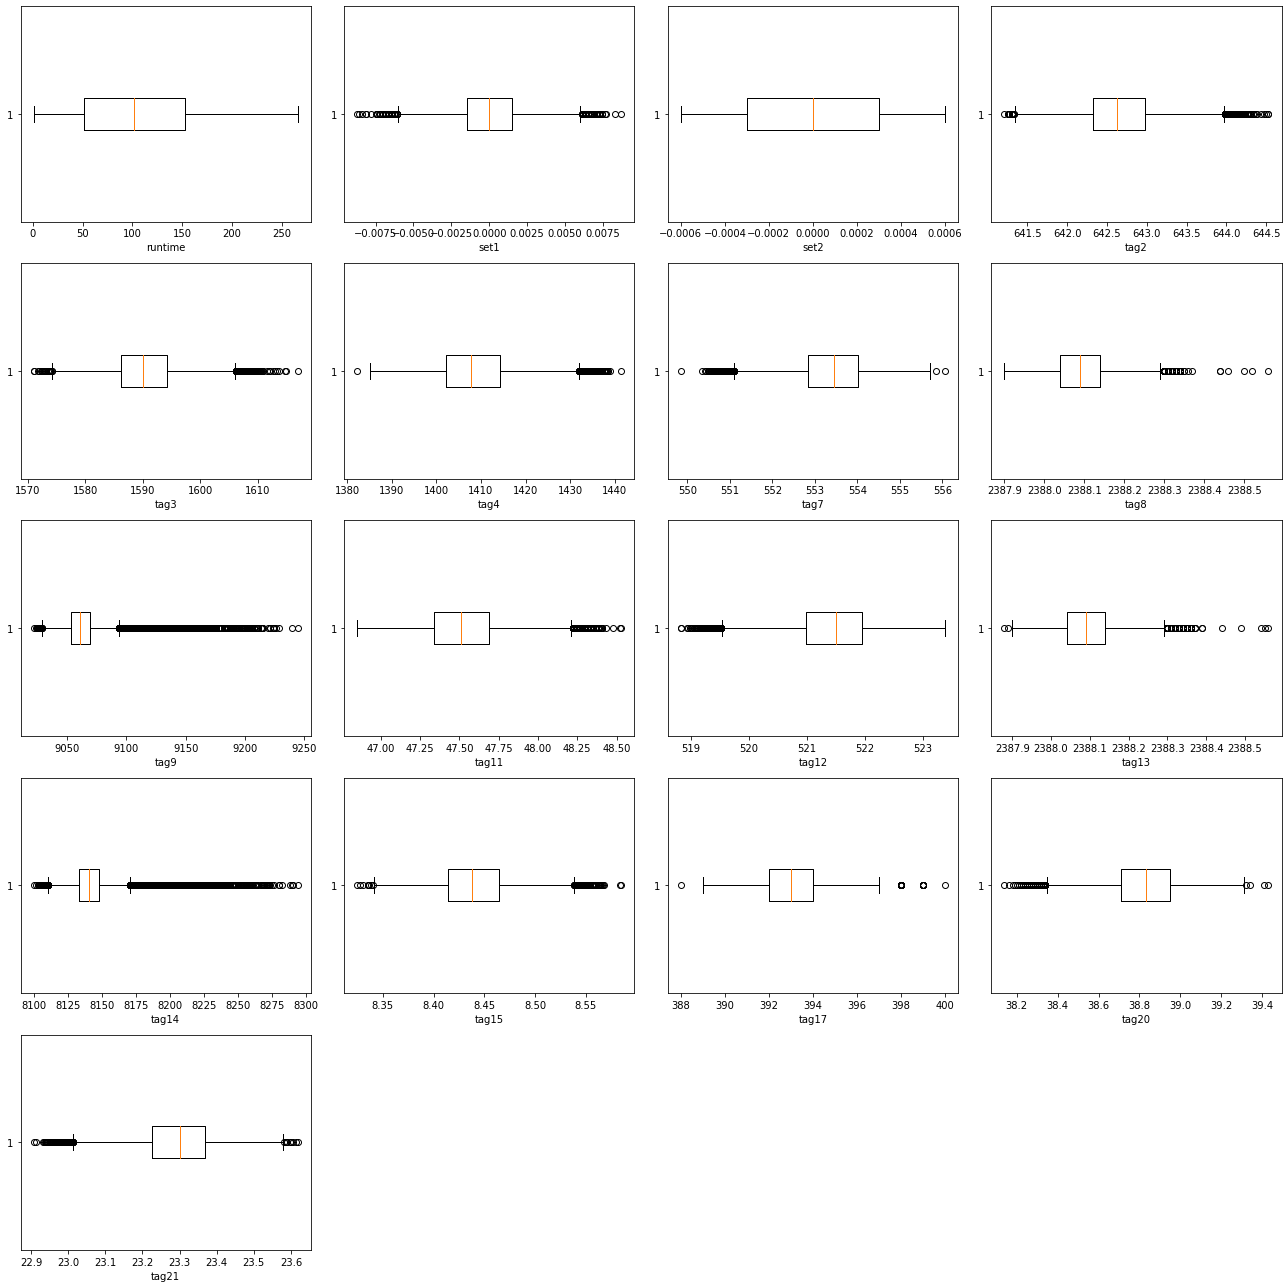

In [8]:
# recreate the feature dataset
data_x = data.drop(['rlu'], axis=1)

# iterate for all feature columns and plot boxplot
fig = plt.figure(figsize=(18,18))
for i in range(1, 18):

    ax = fig.add_subplot(5, 4, i)
    ax.boxplot(data_x.iloc[:, i-1], vert=False)
    ax.set_xlabel(data_x.columns[i-1])

plt.tight_layout()
plt.show()

Almost all the features showed candidates to outliers. However, these values are so close from each other, that do not fully characterize themselves as outliers - i.e. they do not look like real outliers. It seems that these values are the result of measurement signal noise and do not tend to prejudice the modeling. Hence, in this first attempt of model development, they will not be dealt with.

In the case of performance degradation due to outliers, the signal could be subjected to signal processing techniques, such as filtering, low-pass filters, or trend smoothing - moving average for examples. These techniques are out of the scope of this example.

## Correlation Analysis

This step is important to check which features are good candidates for modeling the RLU value. It can be used a first feature selection technique. Also, the correlation may serve as an identification of corrleated features. Here, we will use two correlation coefficients - Pearson and Spearman, to check to linear and non-linear correlation indications. Commonly, the Pearson method have more statistical power, but it has many assumptions about variable distribution (normal, linear correlation). Spearman's method is less rigorous about assumptions and can capture non-linear correlations, provided that they are monothonic.

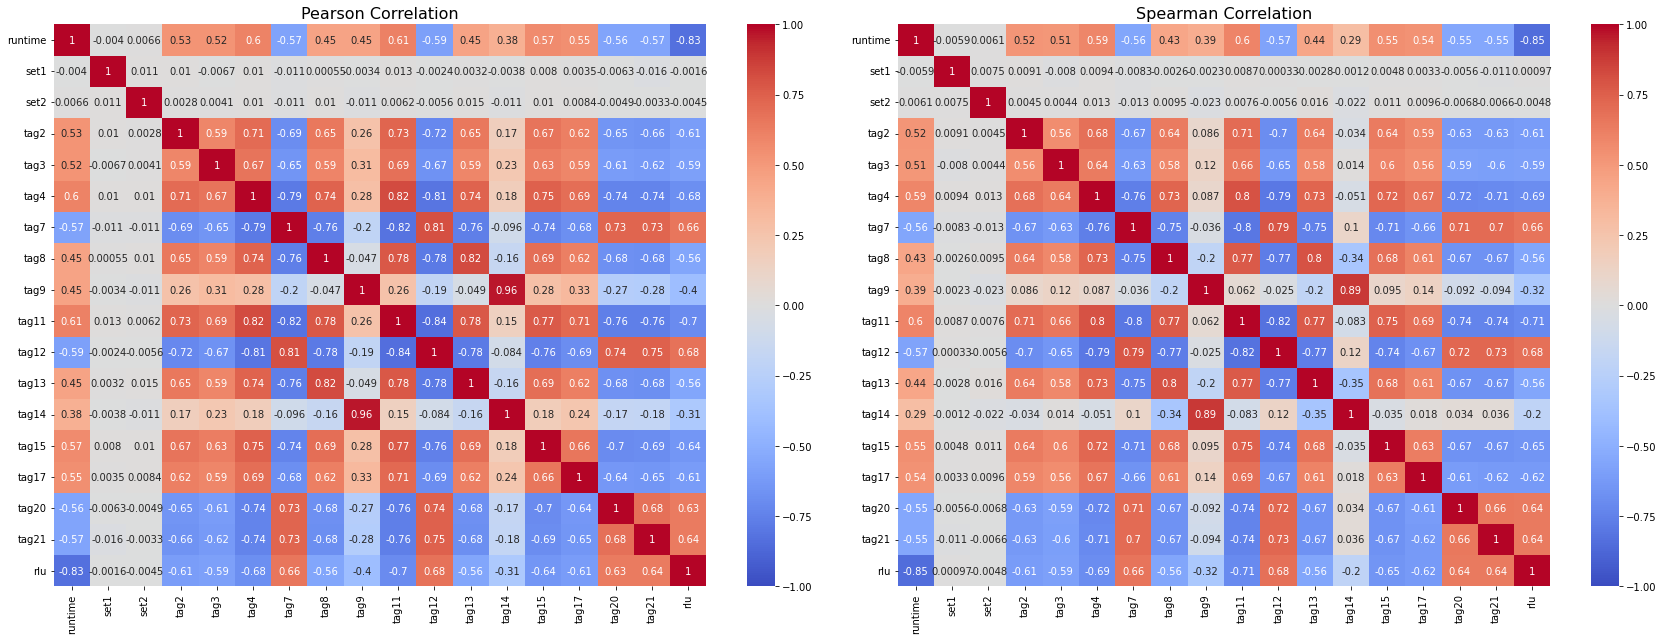

In [9]:
# check correlation heatmap
fig = plt.figure(figsize=(24,9))

ax = fig.add_subplot(1, 2, 1)
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
ax.set_title('Pearson Correlation', size=16)

ax = fig.add_subplot(1, 2, 2)
sns.heatmap(data.corr(method='spearman'), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)
ax.set_title('Spearman Correlation', size=16)

plt.tight_layout()
plt.show()

The analysis shows that the variables `set1` and `set2` are not strongly correlated with RLU. Hence they will be removed from the modeling data.

The RLU depends on all other sensor variables. The majority of them presented a negative correlation, which can suggest a trend of decrease at the same time the asset is closing to failure. However, this observation do not necessarily reproduces the causal relations. It can be due to spurious correlation effect, since it can be observed several signicant feature correlation effects.

There are four features that presents a general trend of increase close to failure. The heatmaps show that the 4 are also correlated between themselves.

Since the feature selection based only in correlation coefficients can be very hard due to multivariate effects and cross-correlation observed in this case, this work will have an automated feature selection technique, wich will be the Recursive Feature Elimination with Cross Validation (using the class `RFECV` from `scikit-learn` module). The wrapping technique will help to select the best combination of features, based on a selection metric.

In [10]:
# drop the weak correlated features
data.drop(['set1', 'set2'], axis=1, inplace=True)
data.head()

,runtime,tag2,tag3,tag4,tag7,tag8,tag9,tag11,tag12,tag13,tag14,tag15,tag17,tag20,tag21,rlu
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


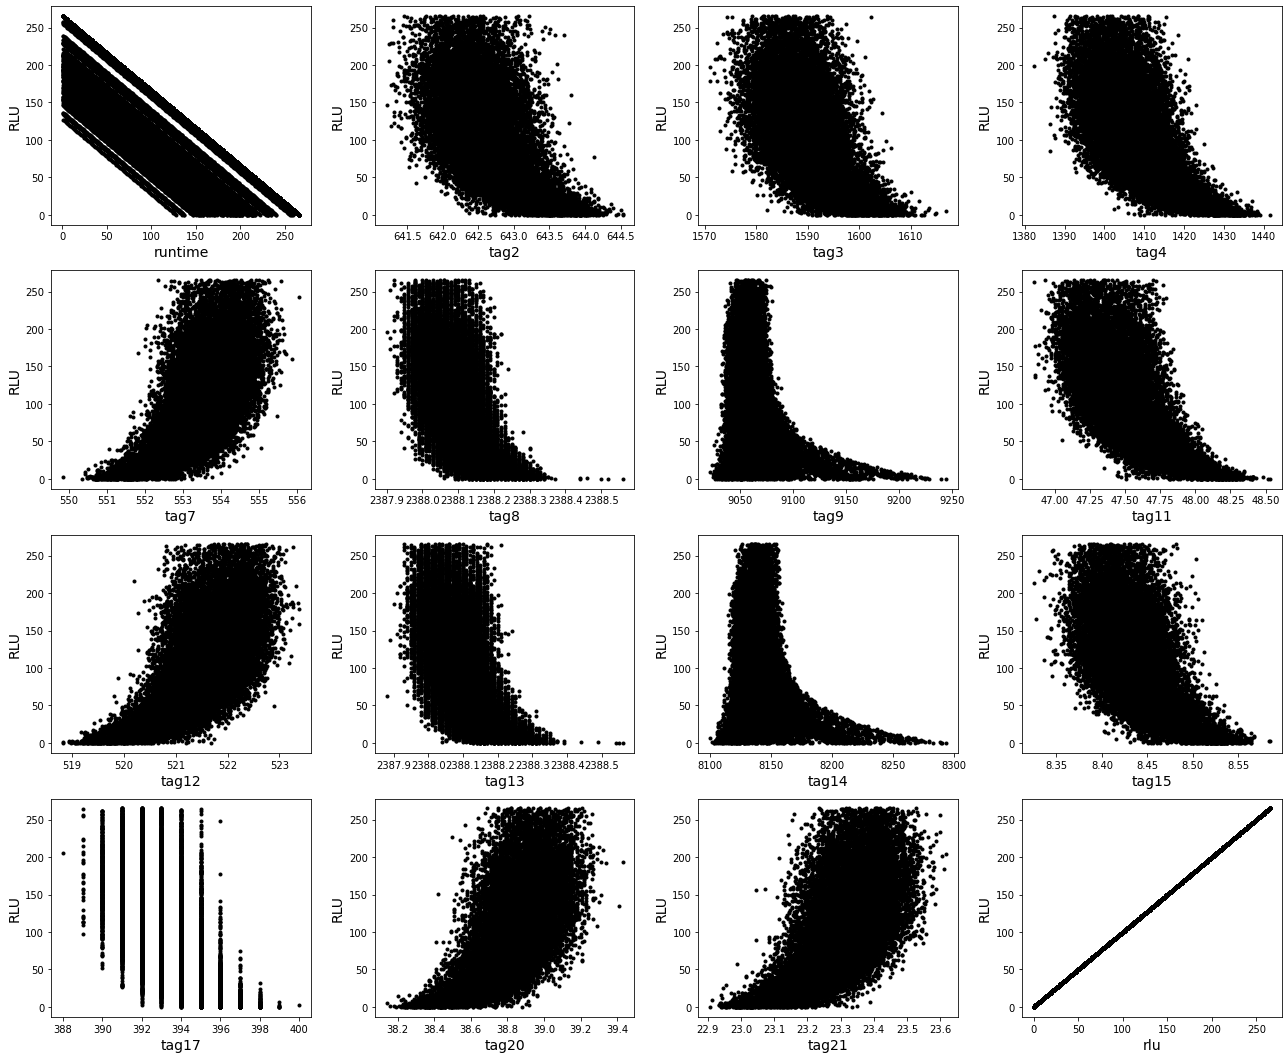

In [11]:
# checking the type of correlations with RLU
fig = plt.figure(figsize=(18,18))

for i in range(1, 17):

    ax = fig.add_subplot(5, 4, i)
    ax.scatter(x=data.iloc[:, i-1], y=data['rlu'], marker='.', color='k')
    ax.set_xlabel(data.columns[i-1], size=14)
    ax.set_ylabel('RLU', size=14)
    
plt.tight_layout()
plt.show()

The scatter plots suggest non-linear relations of all sensor data with RLU, because all plots present a behavior close to a parabole. Tag `tag9` is the most distinct plot, because it suggests a behavior close to $1/x$ curve.

The variable `tag17` looks like a dicrete variable, since the measurements appear in only fixed values. This could be related to instrument precision/sensibility. The non-linear behavior observed suggests two modeling approaches:

- linear models with polynomial engineering features - makes the models more interpretable. However, the application of `PolynomialFeatures` can make the models more prone to overfitting, since a lot of extra variables will be created.
- non-linear models, such as DecisionTrees or RandomForest - more powerful for prediction, but can be less understable for non-technical personnel.

In this work, we will take the second option as a first attempt. Since there are a high degree of multi-covariance in the features, we will choose an ensemble tree-based approach, using models such as RandomForest, ExtraTrees, GradientBoosting, AdaBoost and XGBoost.

In [12]:
# save the treated dataset
data.to_csv(os.path.join(DATASINK, 'rlu_model_data.csv'), index=False)